In [2]:
# Mounting google drive to save and access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from tensorflow.keras.models import load_model

In [4]:
# Defining paths
val_data_path = '/content/drive/MyDrive/00_Final_Project_MENG/Dataset_1/val_data.csv'
model_path = '/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_trained_model_dataset1.keras'
scaler_path = '/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_scaler.sav'

In [5]:
# Load and prepare validation set
val_df = pd.read_csv(val_data_path)         # load validation CSV

X_val = val_df.drop(columns=['__target__']) # features (all columns except target)
y_val = val_df['__target__']                # target labels

In [6]:
# Display the DataFrame
print(f"Validation DataFrame shape: {val_df.shape}")


Validation DataFrame shape: (321, 1873)


In [7]:
# Display first 5 rows
val_df.head(5)

,abdominal_and_pelvic_pain,abdominal_aortic_aneurysm__without_rupture,abdominal_distension__gaseous_,abn_findings_on_dx_imaging_of_abd_regions__inc_retroperiton,abnormal_and_inconclusive_findings_on_dx_imaging_of_breast,abnormal_blood_pressure_reading__without_diagnosis,abnormal_coagulation_profile,abnormal_electrocardiogram__ecg___ekg_,abnormal_finding_of_blood_chemistry__unspecified,abnormal_findings_on_diagnostic_imaging_and_in_function_studies__without_diagnosis,...,vomiting__unspecified,vomiting_without_nausea,weakness,wheezing,white_matter_disease__unspecified,wtrcraft_fall_nos_crew,xerosis_cutis,zoster__herpes_zoster_,zoster_without_complications,__target__
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,1,1


In [8]:
# Load saved scaler and scale validation data

scaler = joblib.load(scaler_path)       # load the previously saved scaler
X_val_scaled = scaler.transform(X_val)  # apply scaling to validation features

In [10]:
# Load Trained MLP model
model = load_model(model_path)

In [11]:
# Generate predictions on validation set

# Get predicted probabilities (values between 0 and 1)
y_pred_probs = model.predict(X_val_scaled).flatten()

# Convert probabilities to binary class labels (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [13]:
# Evaluate model performance on validation set

# Accuracy
acc = accuracy_score(y_val, y_pred)
# Precision
prec = precision_score(y_val, y_pred)
# Recall
rec = recall_score(y_val, y_pred)
# F1-score
f1 = f1_score(y_val, y_pred)
# AUC (ROC)
auc = roc_auc_score(y_val, y_pred_probs)

print("Validation Metrics: MLP Model (Dataset 1)")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

# Classification report
print("\nClassification Report MLP Model (Validation Set - Dataset 1):")
print(classification_report(y_val, y_pred))

Validation Metrics: MLP Model (Dataset 1)
Accuracy:  0.8474
Precision: 0.8171
Recall:    0.8938
F1-score:  0.8537
AUC:       0.9276

Classification Report MLP Model (Validation Set - Dataset 1):
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       161
           1       0.82      0.89      0.85       160

    accuracy                           0.85       321
   macro avg       0.85      0.85      0.85       321
weighted avg       0.85      0.85      0.85       321



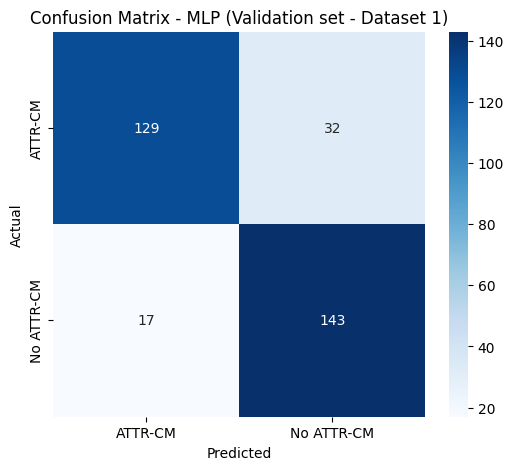

In [19]:
# Confusion Matrix

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['ATTR-CM', 'No ATTR-CM'],  # predicted labels
    yticklabels=['ATTR-CM', 'No ATTR-CM']   # actual labels
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP (Validation set - Dataset 1)')
plt.show()


In [17]:
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_probs))

ROC AUC Score: 0.9276009316770187


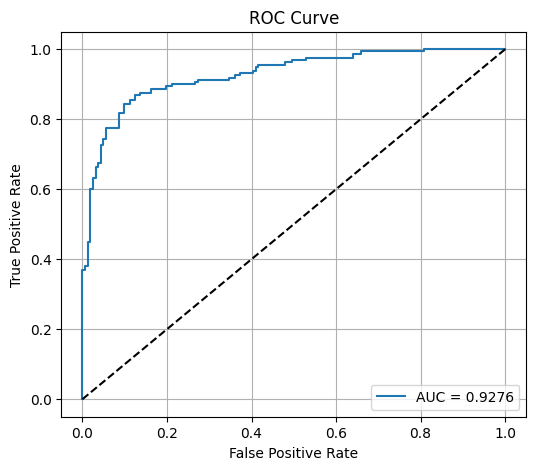

In [18]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], 'k--')     # diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [20]:
# Permutation Feature Importance (Validation set)

from sklearn.inspection import permutation_importance

# Define a scorer for Keras models using ROC-AUC
def keras_roc_auc_scorer(model, X, y):
    y_pred = model.predict(X).ravel()        # predicted probabilities
    return roc_auc_score(y, y_pred)          # compute ROC-AUC

# Compute permutation importance
result = permutation_importance(
    model,
    X_val_scaled,
    y_val,
    scoring=keras_roc_auc_scorer,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# Organize results into a DataFrame
sorted_idx = result.importances_mean.argsort()   # sorting by mean importance
features = X_val.columns[sorted_idx]
importances = result.importances_mean[sorted_idx]
std = result.importances_std[sorted_idx]

feature_importance_val = pd.DataFrame({
    'feature': features,
    'importance_mean': importances,
    'importance_std': std
})

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [21]:
print("\nTop 20 Most Important Features - Validation Set (by Permutation Importance):")
print(feature_importance_val.tail(20).to_string())


Top 20 Most Important Features - Validation Set (by Permutation Importance):
                                                           feature  importance_mean  importance_std
1852               polyneuropathy_in_diseases_classified_elsewhere         0.001366        0.000514
1853                                    unspecified_conjunctivitis         0.001366        0.000428
1854  oth_enthesopathies_of_unspecified_lower_limb__excluding_foot         0.001374        0.000693
1855                carpal_tunnel_syndrome__unspecified_upper_limb         0.001506        0.000672
1856                                             diabetes_mellitus         0.001545        0.000373
1857                          atrioventricular_block__first_degree         0.001623        0.000985
1858              chronic_combined_systolic_and_diastolic_hrt_fail         0.001700        0.001253
1859                                                  cardiomegaly         0.001825        0.000629
1860   complications_a

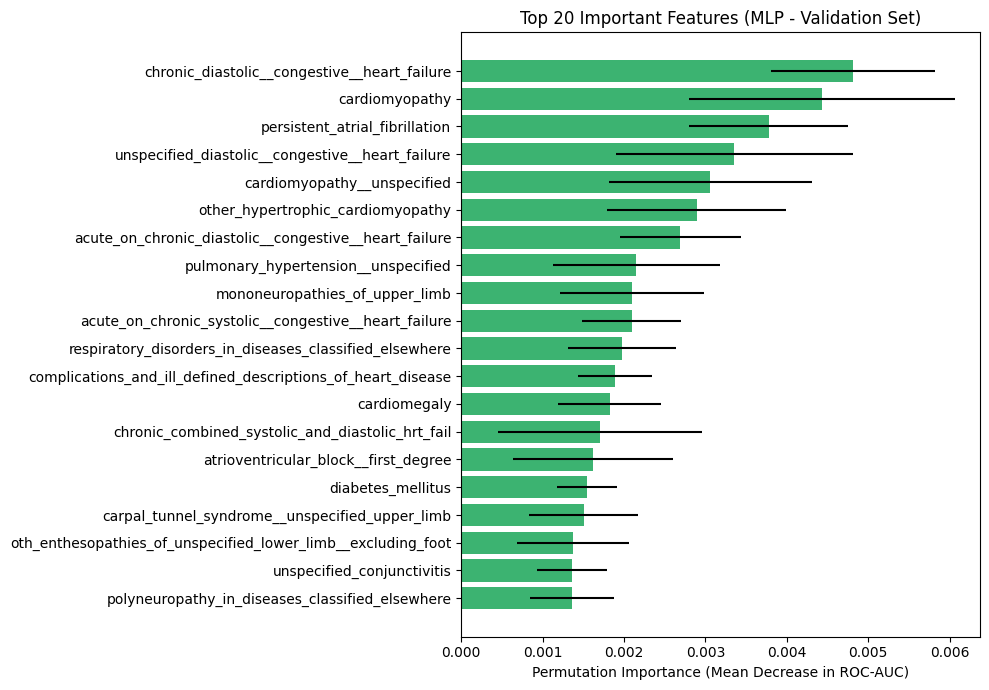

Feature importance plot saved to: /content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_feature_importance_validation.png


In [22]:
# Plot Top 20 Important Features (Validation set)
top_n = 20
top_features_df = feature_importance_val.tail(top_n).sort_values(by='importance_mean', ascending=True)

plt.figure(figsize=(10, 7))

# Horizontal bar plot with error bars
plt.barh(
    top_features_df['feature'],
    top_features_df['importance_mean'],
    xerr=top_features_df['importance_std'],
    color='mediumseagreen'
)

plt.xlabel('Permutation Importance (Mean Decrease in ROC-AUC)')
plt.title('Top 20 Important Features (MLP - Validation Set)')
plt.tight_layout()

# Save the plot to Drive
plot_path = '/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_feature_importance_validation.png'
plt.savefig(plot_path)
plt.show()

print(f"Feature importance plot saved to: {plot_path}")


In [23]:
feature_importance_val.to_csv('/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_feature_importance_validation_set_dataset1.csv', index=False)